Read & Clean Data(dt)

In [610]:
import pandas as pd
import numpy as np

dt = pd.read_csv('.\\CreditPrediction.csv')

# Data preprocessing steps
# axis=1  ==> column
# axis=0  ==> row

dt.info()  # what we have?   10167 r + 20 c

# Remove duplicates
dt.drop_duplicates(inplace=True)

#inplace ==> changes submit on main data

# Remove rows with all elements as NaN(empty)
dt.dropna(how="all", inplace=True) # axis = 0  
# Remove columns with all elements as NaN(empty)  +  # Drop the 'Unnamed: 19'
dt.dropna(axis=1, how="all", inplace=True)

# Drop the 'CLIENTNUM' column
dt.drop("CLIENTNUM", axis=1, inplace=True)
dt.drop("Months_on_book", axis=1, inplace=True)
dt.drop("Total_Ct_Chng_Q4_Q1", axis=1, inplace=True)
# dt.replace("Unknown", np.NAN, inplace=True)


# # Drop the 'Unnamed: 19' column
# dt.drop("Unnamed: 19", axis=1, inplace=True)


row_sample = dt.iloc[2]
col_type = row_sample.apply(type)

for c, dd, in col_type.items():
    print(f"{c} : {dd}")  # we have str + float + int + ... = categorial & numberical

dt  # now what we have after clear?   no : CLIENTNUM  Unnamed: 19  (20-2)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10167 non-null  int64  
 1   Customer_Age              10167 non-null  float64
 2   Gender                    9968 non-null   object 
 3   Dependent_count           10167 non-null  int64  
 4   Education_Level           10167 non-null  object 
 5   Marital_Status            8217 non-null   object 
 6   Income_Category           10167 non-null  object 
 7   Card_Category             8243 non-null   object 
 8   Months_on_book            9944 non-null   float64
 9   Total_Relationship_Count  10147 non-null  float64
 10  Months_Inactive_12_mon    10167 non-null  int64  
 11  Contacts_Count_12_mon     10167 non-null  int64  
 12  Credit_Limit              10167 non-null  float64
 13  Total_Revolving_Bal       10167 non-null  int64  
 14  Total_

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,45.0,M,3,High School,Married,$60K - $80K,Blue,5.0,1,3,12691.0,777,1.335,1144,42,0.061
1,49.0,F,5,Graduate,NaN,Less than $40K,Blue,6.0,1,2,8256.0,864,1.541,1291,33,0.105
2,51.0,M,3,Graduate,Married,$80K - $120K,Blue,4.0,1,0,3418.0,0,2.594,1887,20,0.000
3,40.0,F,4,High School,NaN,Less than $40K,Blue,3.0,4,1,3313.0,2517,1.405,1171,20,0.760
4,40.0,M,3,Uneducated,Married,$60K - $80K,NaN,5.0,1,0,4716.0,0,2.175,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10128,37.0,F,3,High School,NaN,Unknown,NaN,4.0,1,3,2179.0,0,0.725,2568,48,0.000
10134,53.0,M,2,College,NaN,$40K - $60K,Blue,3.0,3,1,4065.0,2180,0.321,1271,36,0.536
10135,56.0,F,2,Uneducated,Married,Unknown,Blue,6.0,3,2,3068.0,1765,0.853,4611,73,0.575
10136,37.0,F,2,Graduate,Married,Less than $40K,NaN,6.0,1,3,1438.3,0,0.707,4733,89,0.000


Encoding

In [611]:
#hot coding  ==> # r2 ==> 86%    mse ==> 11 m
# # Encoding categorical data
#converts categorical columns (whose values ​​are categorical) to dummy variables. 
# This causes each category to become a new column, and a value of 1 in that column indicates 

dt = pd.get_dummies(dt)
dt.info()

# import numpy as np
# # # #r2 ==> 83%    mse ==> 13 m
# Mapping_Gender = {
#     'F': 0,
#     'M': 20000,
# }

# Mapping_Education_Level = {
#     'Unknown': 0,
#     'Uneducated': 6,
#     'High School': 1,
#     'College': 2,
#     'Graguate': 3,
#     'Post-Graduate': 4,
#     'Doctorate': 5,
# }


# Mapping_Marital_Status = {
#     'Unknown': 0,
#     'Single': 4,
#     'Married': 8,
#     'Divorced': 1,
# }

# Mapping_Income_Category = {
#     'Unknown': 0,
#     'Less than $40k': 2,
#     '$40k - $60k': 5,
#     '$60k - $80k': 9,
#     '$80k - $120k': 1,
#     '$120k +': 7,
# }

# Mapping_Card_Category = {
#     'Blue': 1,
#     'Silver': 2,
#     'Gold': 3,
#     'Platinum': 4,
# }


# dt["Gender"] = dt["Gender"].map(Mapping_Gender)
# dt["Education_Level"] = dt["Education_Level"].map(Mapping_Education_Level)
# dt["Marital_Status"] = dt["Marital_Status"].map(Mapping_Marital_Status)
# dt["Income_Category"] = dt["Income_Category"].map(Mapping_Income_Category)
# dt["Card_Category"] = dt["Card_Category"].map(Mapping_Card_Category)


# row_sample = dt.iloc[1]
# col_type = row_sample.apply(type)
# for c, dd, in col_type.items():
#     print(f"{c} : {dd}") # now we have just numberical!

# dt[["Gender","Education_Level","Marital_Status","Income_Category","Card_Category"]]

dt.corr()

# dt.drop("Education_Level", axis=1, inplace=True)
# dt.drop("Education_Level_Doctorate", axis=1, inplace=True)
# dt.drop("Education_Level_Graduate", axis=1, inplace=True)
# dt.drop("Education_Level_High School", axis=1, inplace=True)
# dt.drop("Education_Level_Post-Graduate", axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 10132 entries, 0 to 10145
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    10132 non-null  float64
 1   Dependent_count                 10132 non-null  int64  
 2   Total_Relationship_Count        10112 non-null  float64
 3   Months_Inactive_12_mon          10132 non-null  int64  
 4   Contacts_Count_12_mon           10132 non-null  int64  
 5   Credit_Limit                    10132 non-null  float64
 6   Total_Revolving_Bal             10132 non-null  int64  
 7   Total_Amt_Chng_Q4_Q1            10132 non-null  float64
 8   Total_Trans_Amt                 10132 non-null  int64  
 9   Total_Trans_Ct                  10132 non-null  int64  
 10  Avg_Utilization_Ratio           10132 non-null  float64
 11  Gender_F                        10132 non-null  bool   
 12  Gender_M                        10132

,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
Customer_Age,1.000000,-0.078630,-0.024910,0.032299,0.005839,0.004239,0.005359,-0.049692,-0.020442,-0.027347,...,0.040823,-0.004282,-0.011234,0.011413,-0.010830,-0.012604,0.008047,-0.009176,0.001808,-0.002558
Dependent_count,-0.078630,1.000000,-0.038673,-0.010848,-0.040455,0.068068,-0.002793,-0.035369,0.025035,0.049839,...,0.024845,-0.013533,0.028995,0.047631,-0.046788,-0.019171,-0.016215,0.023357,-0.004858,0.018029
Total_Relationship_Count,-0.024910,-0.038673,1.000000,-0.004258,0.055209,-0.071408,0.014453,0.051229,-0.346697,-0.241301,...,-0.005550,-0.008550,0.005094,0.000678,0.005072,0.000862,0.036594,-0.051804,-0.041609,-0.049822
Months_Inactive_12_mon,0.032299,-0.010848,-0.004258,1.000000,0.029274,-0.020253,-0.041634,-0.032333,-0.036963,-0.042811,...,-0.002641,-0.021226,-0.004587,-0.005880,0.018617,0.011446,0.008316,-0.001760,-0.001125,-0.013706
Contacts_Count_12_mon,0.005839,-0.040455,0.055209,0.029274,1.000000,0.020836,-0.054181,-0.024252,-0.112652,-0.151961,...,0.020747,0.002006,0.000177,0.011481,-0.023127,0.002381,-0.012074,0.002111,0.001608,0.002189
Credit_Limit,0.004239,0.068068,-0.071408,-0.020253,0.020836,1.000000,0.042590,0.012901,0.171779,0.075927,...,0.339242,-0.161564,0.093894,0.333887,-0.395104,0.033854,-0.247375,0.212187,0.095208,0.395515
Total_Revolving_Bal,0.005359,-0.002793,0.014453,-0.041634,-0.054181,0.042590,1.000000,0.057919,0.064306,0.055927,...,0.020260,0.005544,-0.003842,0.022771,-0.016254,-0.020516,-0.011128,0.017968,0.005993,0.000436
Total_Amt_Chng_Q4_Q1,-0.049692,-0.035369,0.051229,-0.032333,-0.024252,0.012901,0.057919,1.000000,0.039849,0.005642,...,-0.009413,-0.001257,0.022503,0.013018,-0.025112,0.007864,0.000131,0.006560,0.006032,0.002427
Total_Trans_Amt,-0.020442,0.025035,-0.346697,-0.036963,-0.112652,0.171779,0.064306,0.039849,1.000000,0.807159,...,0.010297,0.000026,0.005549,0.009864,-0.008706,-0.012664,-0.092632,0.092181,0.057665,0.128524
Total_Trans_Ct,-0.027347,0.049839,-0.241301,-0.042811,-0.151961,0.075927,0.055927,0.005642,0.807159,1.000000,...,-0.013683,0.002468,-0.027522,-0.038941,0.040840,0.020946,-0.055933,0.072469,0.042071,0.077867


Fill Nans

In [612]:
# from sklearn.impute import KNNImputer

# # Create the imputer object with a specified number of neighbors
# imputer = KNNImputer(n_neighbors=7, weights="uniform", metric="nan_euclidean")

# # Fit the imputer on your data and transform it
# # 'dt' is your DataFrame with NaN values
# dataframe_filled = imputer.fit_transform(dt)

# # If you want to convert the numpy array back to a DataFrame
# dataframe_filled = pd.DataFrame(dataframe_filled, columns=dt.columns)
# d = dataframe_filled.drop("Credit_Limit", axis=1)
# d


Splitting

In [613]:
# # Splitting the dataset
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(d, dataframe_filled['Credit_Limit'], test_size=0.2, random_state=42)

Scaling

In [614]:
# from sklearn.preprocessing import StandardScaler

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit the scaler to the training data and transform it
# X_train_scaled = scaler.fit_transform(X_train)

# # Now X_train_scaled contains the scaled training data
# # Transform the test data with the same scaler
# X_test_scaled = scaler.transform(X_test)

Fill Nans & Split & Scale in 2 sides

In [615]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest, chi2


# Step 1: Split the dataset
X = dt.drop('Credit_Limit', axis=1)
y = dt['Credit_Limit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Step 2: Impute missing values
imputer = KNNImputer(n_neighbors=7, weights="uniform", metric="nan_euclidean")
X_train_filled = imputer.fit_transform(X_train)
X_train_filled = pd.DataFrame(X_train_filled, columns=X_train.columns)

# Step 3: Scale only the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filled)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Step 4: Impute the missing values in the test data
X_test_filled = imputer.transform(X_test)
X_test_filled = pd.DataFrame(X_test_filled, columns=X_test.columns)

# Step 5: Scale the test data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test_filled)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Calculate Mutual Information
mi_scores = mutual_info_regression(X_train_scaled, y_train)

# Select features based on MI scores
# Here we assume a threshold of 0.01 for demonstration purposes
selected_features = X_train.columns[mi_scores > 0.01]
X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]


# # Find the minimum value in X_train_selected
# min_value = np.min(X_train_selected)

# # Add the absolute value of min_value to all features
# X_train_non_negative = X_train_selected + np.abs(min_value)
# X_test_non_negative = X_test_selected + np.abs(min_value)

# # Assuming X_train_selected contains both numerical and categorical features
# # Select the top k features based on Chi-Square scores
# k = 5  # Choose the desired number of features
# selector = SelectKBest(chi2, k=k)
# X_train_chi2 = selector.fit_transform(X_train_non_negative, y_train)
# X_test_chi2 = selector.transform(X_test_non_negative)

# from sklearn.model_selection import train_test_split
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import StandardScaler

# # Step 1: Split the dataset
# temp = ["Income_Category", "Income_Category"]
# X = dt.drop('Credit_Limit', axis=1)
# y = dt['Credit_Limit']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 2: Impute missing values
# imputer = KNNImputer(n_neighbors=7, weights="uniform", metric="nan_euclidean")
# X_train_filled = imputer.fit_transform(X_train[temp])
# X_train_filled = pd.DataFrame(X_train_filled, columns=temp)

# # Step 3: Scale only the training data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_filled)
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# # Step 4: Impute the missing values in the test data
# X_test_filled = imputer.transform(X_test[temp])
# X_test_filled = pd.DataFrame(X_test_filled, columns=temp)

# # Step 5: Scale the test data using the scaler fitted on the training data
# X_test_scaled = scaler.transform(X_test_filled)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)




Outlier Handling

In [616]:
# import numpy as np
# from scipy import stats

# z_scores = np.abs(stats.zscore(X_train_selected))

# filtered_entries = (z_scores < 3).all(axis=1)
# features_clean = X_train_selected[filtered_entries]
# labels_clean = X_test_selected[filtered_entries]

# # Calculate IQR and bounds
# Q1 = X_train_scaled.quantile(0.3)
# Q3 = X_train_scaled.quantile(0.7)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers in X_train_scaled
# outliers_mask = ((X_train_scaled < lower_bound) | (X_train_scaled > upper_bound)).any(axis=1)

# # Filter X_train_scaled and y_train
# X_train_scaled_no_outliers = X_train_scaled[~outliers_mask]
# y_train_no_outliers = y_train.loc[X_train_scaled.index[~outliers_mask]]

# # Repeat for X_test_scaled and y_test
# outliers_mask_test = ((X_test_scaled < lower_bound) | (X_test_scaled > upper_bound)).any(axis=1)
# X_test_scaled_no_outliers = X_test_scaled[~outliers_mask_test]
# y_test_no_outliers = y_test.loc[X_test_scaled.index[~outliers_mask_test]]

# Q1 = X_train_scaled['Credit_Limit'].quantile(0.3)
# Q3 = X_train_scaled['Credit_Limit'].quantile(0.7)
# IQR = Q3 - Q1

# X_train_scaled = X_train_scaled[~((X_train_scaled['Credit_Limit'] < (Q1-1.5*IQR)) | (X_train_scaled['Credit_Limit'] > (Q3+1.5*IQR)))]


Model selection

In [617]:
# Model selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

model = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=11,
                              min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                              max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0,
                              bootstrap=True, oob_score=False, n_jobs=None, random_state=30,
                              verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

model.fit(X_train_selected, y_train)

# Apply Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=17)  # Choose the desired number of features
X_train_rfe = rfe.fit_transform(X_train_selected, y_train)
X_test_rfe = rfe.transform(X_test_selected)

y_pred = model.predict(X_test_rfe)

#----------------------------------------------------------------------------------------
# from sklearn.ensemble import AdaBoostRegressor

# # Initialize AdaBoostRegressor   ==>   MSE = 10 mil    not good!
# adaboost_model = AdaBoostRegressor(base_estimator=model, n_estimators=100, random_state=42)

# # Fit the model with RFE-transformed features
# adaboost_model.fit(X_train_rfe, y_train)

# # Predictions
# y_pred_adaboost = adaboost_model.predict(X_test_rfe)

# # Evaluate the performance (you can use any relevant metric)
# # For example, mean squared error (MSE):
# from sklearn.metrics import mean_squared_error
# mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
# print(f"AdaBoost MSE: {mse_adaboost:.4f}")



c:\Users\Almahdi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Model evaluation

In [618]:
# Model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

scores = cross_val_score(model, X_train_filled, y_train, cv=5)
print("Cross-validated scores:", scores)

#--------------------------------------------------------------

r2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print(f"R2 error:", {r2})
print(f"Mean Squared Error(MSE):", {MSE})
print(f"R Mean Squared Error(RMSE):", {math.sqrt(MSE)})
print(f"Mean Absolute Error(MAE):", {MAE})

print(y_pred)
print(y_test)
print(y_train)





Cross-validated scores: [0.87270745 0.86238534 0.88098018 0.89017013 0.8835133 ]
R2 error: {0.8846075426471413}
Mean Squared Error(MSE): {9556983.440130858}
R Mean Squared Error(RMSE): {3091.43711566819}
Mean Absolute Error(MAE): {1128.6865521277737}
[17252.15501154  2346.14576821  2464.38147322 ...  9101.74637179
 16446.77503125  8811.13846708]
3806     7015.0
9029     2340.0
1426     2437.0
6074     3892.0
8250     6383.0
         ...   
5456     9654.0
3028    34516.0
6353     9090.0
4438    19402.0
8555     6146.0
Name: Credit_Limit, Length: 2027, dtype: float64
2969     1438.3
8236     3023.0
2422     1612.0
1366    12766.0
3114     3071.0
         ...   
8772     7645.0
163      3482.0
6012     2069.0
6558     1686.0
7115     4975.0
Name: Credit_Limit, Length: 8105, dtype: float64


In [619]:
# from sklearn.impute import SimpleImputer
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
#import numpy as np



# dt = dt.drop(['CLIENTNUM','Customer_Age', 'Gender', 'Education_Level', 'Marital_Status', 'Card_Category','Unnamed: 19'], axis=1)

# X_train, X_test, y_train, y_test = train_test_split(
# dt[['Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
# 'Contacts_Count_12_mon','Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1',
# 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']],
# dt['Credit_Limit'], test_size=0.2, shuffle=True)


# imputer = SimpleImputer(strategy='mean')
# X_train = imputer.fit_transform(X_train)
# X_test = imputer.transform(X_test)
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)
# y_pred_test = regressor.predict(X_test) # predicted value of y_test

# mse_test = mean_squared_error(y_test, y_pred_test)
# print("Mean Squared Error (Test):", mse_test)
# print(math.sqrt(mean_squared_error(y_test, y_pred_test)))

# r2_test = r2_score(y_test, y_pred_test)
# mae_test = mean_absolute_error(y_test, y_pred_test)
# print("R-squared (Test):", r2_test)
# print("Mean Absolute Error (Test):", mae_test)


# degree = 2
# poly_features = PolynomialFeatures(degree=degree, include_bias=False)
# X_train_poly = poly_features.fit_transform(X_train)
# X_test_poly = poly_features.transform(X_test)
# X_train_poly = imputer.fit_transform(X_train_poly)
# X_test_poly = imputer.transform(X_test_poly)

# # Train the model
# regressor = LinearRegression()
# regressor.fit(X_train_poly, y_train)

# y_pred_test = regressor.predict(X_test_poly)

# mse_test = mean_squared_error(y_test, y_pred_test)

# print("Mean Squared Error (Test):", mse_test)
# print("Square Root of Mean Squared Error (Test):", np.sqrt(mse_test))
# print(X_train_poly.shape)
# r2_test = r2_score(y_test, y_pred_test)
# mae_test = mean_absolute_error(y_test, y_pred_test)
# print("Mean Squared Error (Test):", mse_test)
# print("R-squared (Test):", r2_test)
# print("Mean Absolute Error (Test):", mae_test)


Matlab & Tables

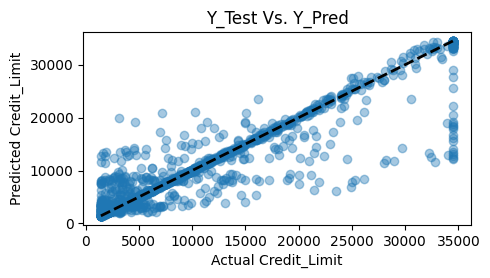

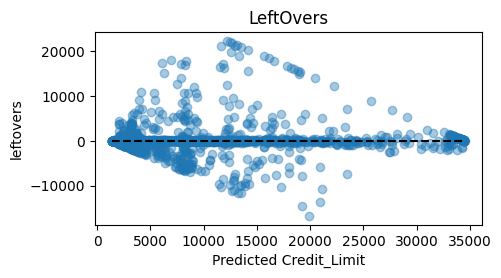

In [620]:
import matplotlib.pyplot as plt

# test ==> actual   /    pred ==> predicted
leftovers = y_test - y_pred
#same as
plt.figure(figsize=(5,2.5))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.title("Y_Test Vs. Y_Pred")
plt.xlabel("Actual Credit_Limit")
plt.ylabel("Predicted Credit_Limit")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=2)
plt.show()

#---------------------------------------------------------------------------------------
#errors
plt.figure(figsize=(5,2.5))
plt.scatter(y_pred, leftovers, alpha=0.4)
plt.title("LeftOvers")
plt.xlabel("Predicted Credit_Limit")
plt.ylabel("leftovers")
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors="black", linestyles="--")
plt.show()
